In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("anime.csv")

In [3]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


**Data Preprocessing:**

**Feature Extraction:**

In [4]:
df.shape

(12294, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [6]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [7]:
df.isnull().sum()/df.shape[0]*100

anime_id    0.000000
name        0.000000
genre       0.504311
type        0.203351
episodes    0.000000
rating      1.870831
members     0.000000
dtype: float64

In [8]:
df.duplicated().sum()

0

In [9]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

name
Shi Wan Ge Leng Xiaohua                           2
Saru Kani Gassen                                  2
Bakabon Osomatsu no Karee wo Tazunete Sansenri    1
Backkom Meogeujan Yeohaeng                        1
Backkom Mission Impossible                        1
                                                 ..
Yoroiden Samurai Troopers Kikoutei Densetsu       1
Yuu☆Yuu☆Hakusho: Mu Mu Hakusho                    1
3-gatsu no Lion meets Bump of Chicken             1
Bannou Bunka Neko-Musume                          1
Yasuji no Pornorama: Yacchimae!!                  1
Name: count, Length: 12292, dtype: int64
******************************
genre
Hentai                                                  823
Comedy                                                  523
Music                                                   301
Kids                                                    199
Comedy, Slice of Life                                   179
                                             

In [10]:
df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [11]:
df.describe(include="object")

,name,genre,type,episodes
count,12294,12232,12269,12294
unique,12292,3264,6,187
top,Shi Wan Ge Leng Xiaohua,Hentai,TV,1
freq,2,823,3787,5677


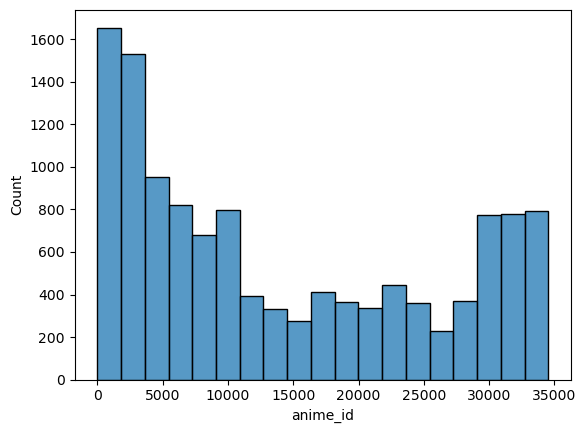

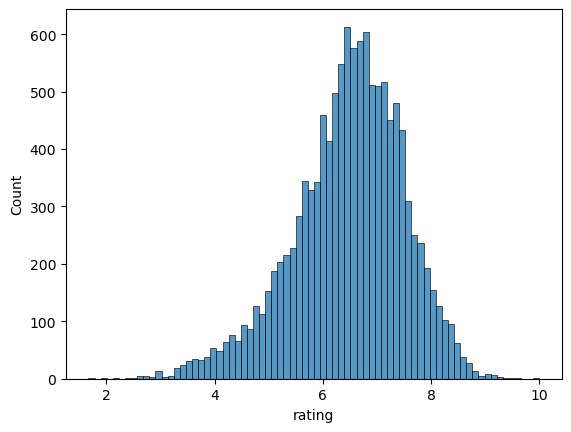

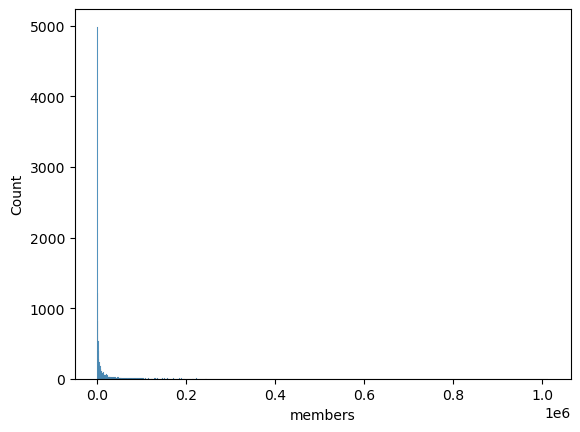

In [12]:
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

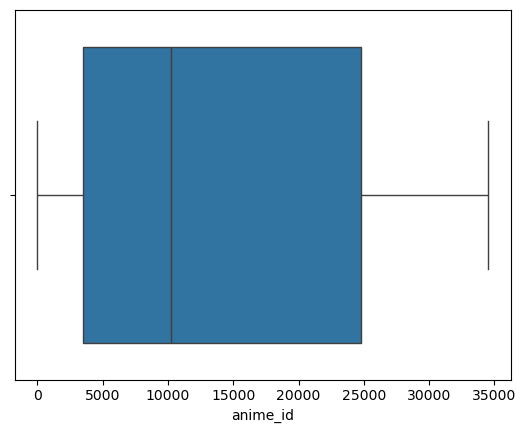

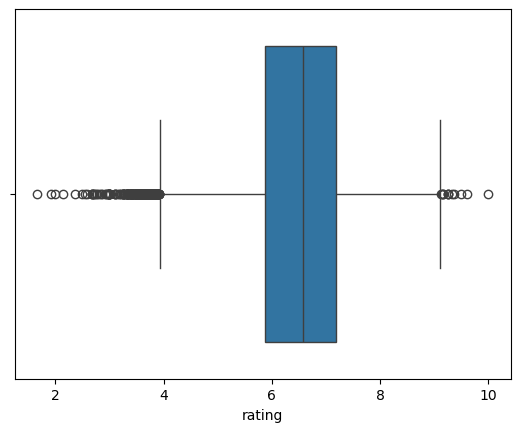

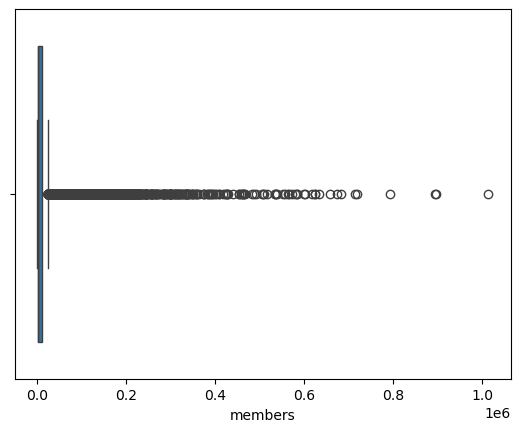

In [13]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

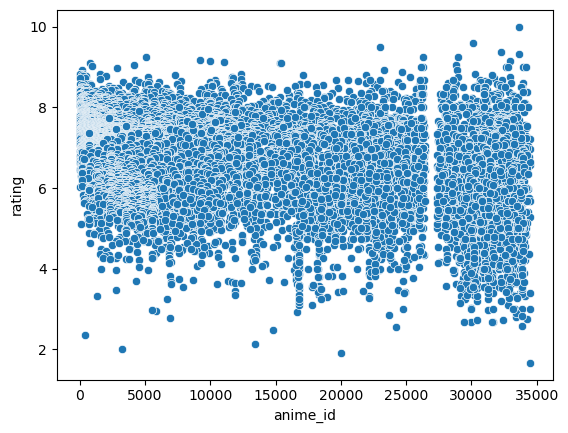

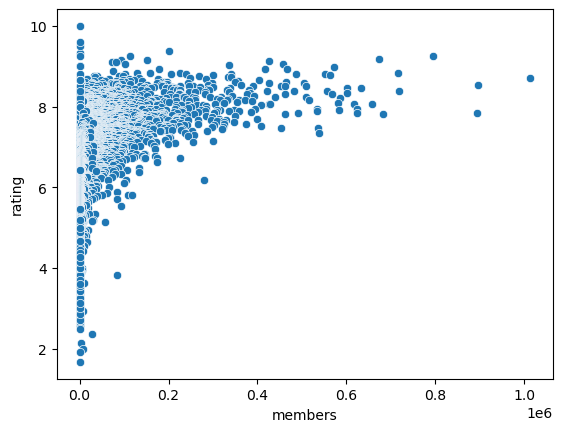

In [14]:
for i in ['anime_id', 'members']:
    sns.scatterplot(data=df,x=i,y='rating')
    plt.show()

In [15]:
df.select_dtypes(include="number").columns

Index(['anime_id', 'rating', 'members'], dtype='object')

In [16]:
s=df.select_dtypes(include="number").corr()

<Axes: >

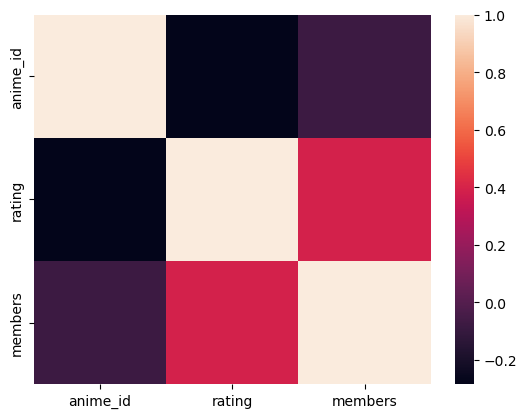

In [17]:
sns.heatmap(s)

In [18]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [19]:
pd.get_dummies(data=df,columns=["genre","type"],drop_first=True)

,anime_id,name,episodes,rating,members,"genre_Action, Adventure","genre_Action, Adventure, Cars, Comedy, Sci-Fi, Shounen","genre_Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports","genre_Action, Adventure, Cars, Sci-Fi","genre_Action, Adventure, Comedy",...,"genre_Super Power, Supernatural, Vampire",genre_Supernatural,genre_Thriller,genre_Vampire,genre_Yaoi,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,32281,Kimi no Na wa.,1,9.37,200630,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,5114,Fullmetal Alchemist: Brotherhood,64,9.26,793665,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,28977,Gintama°,51,9.25,114262,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,9253,Steins;Gate,24,9.17,673572,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,9969,Gintama&#039;,51,9.16,151266,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,1,4.15,211,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
12290,5543,Under World,1,4.28,183,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
12291,5621,Violence Gekiga David no Hoshi,4,4.88,219,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,1,4.98,175,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


<Axes: >

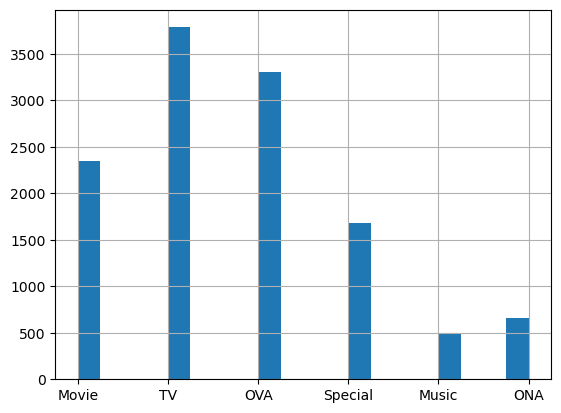

In [20]:
df['type'].hist(bins=20)

In [21]:
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [22]:
wisker(df['members'])

(-13593.0, 23255.0)

In [23]:
df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [24]:
for i in ['rating', 'members']:
    lw,uw=wisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])

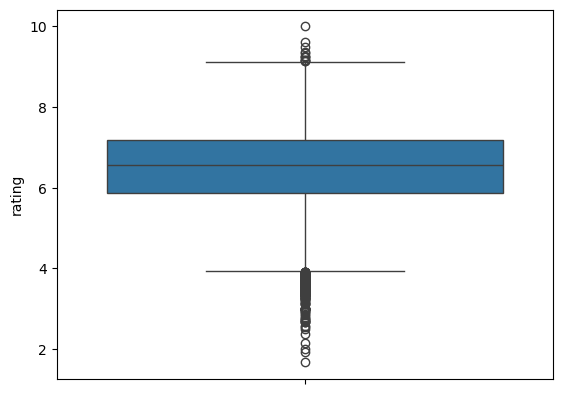

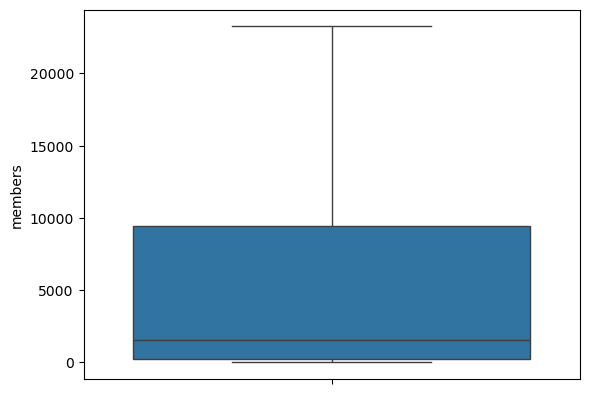

In [25]:
for i in ['rating', 'members']:
    sns.boxplot(df[i])
    plt.show()

In [26]:
df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [27]:
df['genre'].value_counts()

genre
Hentai                                                  823
Comedy                                                  523
Music                                                   301
Kids                                                    199
Comedy, Slice of Life                                   179
                                                       ... 
Adventure, Drama, Fantasy, Game, Sci-Fi                   1
Adventure, Demons, Fantasy, Historical                    1
Action, Comedy, Drama, Mecha, Music, Sci-Fi, Shounen      1
Action, Comedy, Fantasy, Mecha, Sci-Fi, Shounen           1
Hentai, Slice of Life                                     1
Name: count, Length: 3264, dtype: int64

In [28]:
df['name'].value_counts()

name
Shi Wan Ge Leng Xiaohua                           2
Saru Kani Gassen                                  2
Bakabon Osomatsu no Karee wo Tazunete Sansenri    1
Backkom Meogeujan Yeohaeng                        1
Backkom Mission Impossible                        1
                                                 ..
Yoroiden Samurai Troopers Kikoutei Densetsu       1
Yuu☆Yuu☆Hakusho: Mu Mu Hakusho                    1
3-gatsu no Lion meets Bump of Chicken             1
Bannou Bunka Neko-Musume                          1
Yasuji no Pornorama: Yacchimae!!                  1
Name: count, Length: 12292, dtype: int64

In [29]:
df['type'].value_counts()

type
TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: count, dtype: int64

**Recommendation System:**

In [30]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def recommend_anime(anime_id, anime_data):
    # Extracting genres and types as features for recommendation
    features = anime_data['genre'] + ', ' + anime_data['type']
    
    # Initialize CountVectorizer to convert text to matrix of token counts
    vectorizer = CountVectorizer()
    feature_matrix = vectorizer.fit_transform(features)
    
    # Calculate cosine similarity between anime
    cosine_similarities = cosine_similarity(feature_matrix)
    
    # Get index of the anime
    anime_index = anime_data.index[anime_data['anime_id'] == anime_id].tolist()[0]
    
    # Get similar anime indices sorted by similarity (excluding the target anime)
    similar_anime_indices = cosine_similarities[anime_index].argsort()[::-1][1:]
    
    # Recommend similar anime
    recommended_anime = anime_data.iloc[similar_anime_indices]
    
    return recommended_anime

# Example usage
anime_data = pd.DataFrame({
    'anime_id': [32281, 5114, 28977, 9253, 9969],
    'name': ['Kimi no Na wa.', 'Fullmetal Alchemist: Brotherhood', 'Gintama°', 'Steins;Gate', 'Gintama'],
    'genre': ['Drama, Romance, School, Supernatural', 'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen', 
              'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen', 'Sci-Fi, Thriller', 
              'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen'],
    'type': ['Movie', 'TV', 'TV', 'TV', 'TV'],
    'episodes': [1, 64, 51, 24, 51],
    'rating': [9.37, 9.26, 9.25, 9.17, 9.16],
    'members': [200630, 793665, 114262, 673572, 151266]
})

recommended_anime = recommend_anime(32281, anime_data)
print("Recommended Anime:")
print(recommended_anime)


Recommended Anime:
   anime_id                              name  \
1      5114  Fullmetal Alchemist: Brotherhood   
4      9969                           Gintama   
3      9253                       Steins;Gate   
2     28977                          Gintama°   

                                               genre type  episodes  rating  \
1  Action, Adventure, Drama, Fantasy, Magic, Mili...   TV        64    9.26   
4  Action, Comedy, Historical, Parody, Samurai, S...   TV        51    9.16   
3                                   Sci-Fi, Thriller   TV        24    9.17   
2  Action, Comedy, Historical, Parody, Samurai, S...   TV        51    9.25   

   members  
1   793665  
4   151266  
3   673572  
2   114262  


In [31]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def recommend_similar_anime(anime_id, anime_data):
    # Extracting genres and types as features for recommendation
    features = anime_data['genre'] + ', ' + anime_data['type']
    
    # Initialize CountVectorizer to convert text to matrix of token counts
    vectorizer = CountVectorizer()
    feature_matrix = vectorizer.fit_transform(features)
    
    # Calculate cosine similarity between anime
    cosine_similarities = cosine_similarity(feature_matrix)
    
    # Get index of the anime
    anime_index = anime_data.index[anime_data['anime_id'] == anime_id].tolist()[0]
    
    # Get similar anime indices sorted by similarity (excluding the target anime)
    similar_anime_indices = cosine_similarities[anime_index].argsort()[::-1][1:]
    
    # Recommend similar anime
    similar_anime = anime_data.iloc[similar_anime_indices].reset_index(drop=True)
    
    return similar_anime

# Example usage
anime_data = pd.DataFrame({
    'anime_id': [32281, 5114, 28977, 9253, 9969],
    'name': ['Kimi no Na wa.', 'Fullmetal Alchemist: Brotherhood', 'Gintama°', 'Steins;Gate', 'Gintama'],
    'genre': ['Drama, Romance, School, Supernatural', 'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen', 
              'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen', 'Sci-Fi, Thriller', 
              'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen'],
    'type': ['Movie', 'TV', 'TV', 'TV', 'TV'],
    'episodes': [1, 64, 51, 24, 51],
    'rating': [9.37, 9.26, 9.25, 9.17, 9.16],
    'members': [200630, 793665, 114262, 673572, 151266]
})

target_anime_id = 32281  # Example target anime ID: Kimi no Na wa.
similar_anime = recommend_similar_anime(target_anime_id, anime_data)
print("Recommended Anime similar to Kimi no Na wa.:")
print(similar_anime)


Recommended Anime similar to Kimi no Na wa.:
   anime_id                              name  \
0      5114  Fullmetal Alchemist: Brotherhood   
1      9969                           Gintama   
2      9253                       Steins;Gate   
3     28977                          Gintama°   

                                               genre type  episodes  rating  \
0  Action, Adventure, Drama, Fantasy, Magic, Mili...   TV        64    9.26   
1  Action, Comedy, Historical, Parody, Samurai, S...   TV        51    9.16   
2                                   Sci-Fi, Thriller   TV        24    9.17   
3  Action, Comedy, Historical, Parody, Samurai, S...   TV        51    9.25   

   members  
0   793665  
1   151266  
2   673572  
3   114262  


In [43]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def recommend_similar_anime(anime_id, anime_data, threshold=0.5):
    # Extracting genres and types as features for recommendation
    features = anime_data['genre'] + ', ' + anime_data['type']
    
    # Initialize CountVectorizer to convert text to matrix of token counts
    vectorizer = CountVectorizer()
    feature_matrix = vectorizer.fit_transform(features)
    
    # Calculate cosine similarity between anime
    cosine_similarities = cosine_similarity(feature_matrix)
    
    # Get index of the anime
    anime_index = anime_data.index[anime_data['anime_id'] == anime_id].tolist()[0]
    
    # Get similar anime indices sorted by similarity (excluding the target anime)
    similar_anime_indices = cosine_similarities[anime_index].argsort()[::-1][1:]
    
    # Filter anime based on similarity threshold
    similar_anime_indices = similar_anime_indices[cosine_similarities[anime_index][similar_anime_indices] >= threshold]
    
    # Recommend similar anime
    similar_anime = anime_data.iloc[similar_anime_indices].reset_index(drop=True)
    
    return similar_anime

# Example usage
anime_data = pd.DataFrame({
    'anime_id': [32281, 5114, 28977, 9253, 9969],
    'name': ['Kimi no Na wa.', 'Fullmetal Alchemist: Brotherhood', 'Gintama°', 'Steins;Gate', 'Gintama'],
    'genre': ['Drama, Romance, School, Supernatural', 'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen', 
              'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen', 'Sci-Fi, Thriller', 
              'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen'],
    'type': ['Movie', 'TV', 'TV', 'TV', 'TV'],
    'episodes': [1, 64, 51, 24, 51],
    'rating': [9.37, 9.26, 9.25, 9.17, 9.16],
    'members': [200630, 793665, 114262, 673572, 151266]
})

target_anime_id = 32281  # Example target anime ID: Kimi no Na wa.
threshold = 0.1  # Example threshold value

similar_anime = recommend_similar_anime(target_anime_id, anime_data, threshold)
print(f"Recommended Anime similar to Kimi no Na wa. with similarity threshold {threshold}:")
print(similar_anime)


Recommended Anime similar to Kimi no Na wa. with similarity threshold 0.1:
   anime_id                              name  \
0      5114  Fullmetal Alchemist: Brotherhood   

                                               genre type  episodes  rating  \
0  Action, Adventure, Drama, Fantasy, Magic, Mili...   TV        64    9.26   

   members  
0   793665  


**Evaluation:**

In [33]:
from sklearn.model_selection import train_test_split

# Original dataset
anime_data = pd.DataFrame(df)
# Splitting into features and target variable
X = anime_data[['anime_id', 'genre', 'type', 'episodes', 'rating', 'members']]
y = anime_data['name']  # Target variable, anime name

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (9835, 6) (9835,)
Testing set shape: (2459, 6) (2459,)


In [34]:
def evaluate_recommendation_system(actual, recommended):
    """
    Evaluate the recommendation system using precision, recall, and F1-score.

    Parameters:
    actual (list): List of actual anime names liked by the user.
    recommended (list): List of recommended anime names.

    Returns:
    precision (float): Precision score.
    recall (float): Recall score.
    f1_score (float): F1-score.
    """
    # Convert the actual and recommended lists to sets for efficient computation
    actual_set = set(actual)
    recommended_set = set(recommended)
    
    # Calculate True Positives (TP), False Positives (FP), and False Negatives (FN)
    tp = len(actual_set.intersection(recommended_set))
    fp = len(recommended_set.difference(actual_set))
    fn = len(actual_set.difference(recommended_set))
    
    # Calculate Precision, Recall, and F1-score
    precision = tp / (tp + fp) if tp + fp > 0 else 0
    recall = tp / (tp + fn) if tp + fn > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
    
    return precision, recall, f1_score

# Example usage
actual_likes = ['Kimi no Na wa.', 'Fullmetal Alchemist: Brotherhood']
recommended_anime = ['Kimi no Na wa.', 'Gintama°']

precision, recall, f1_score = evaluate_recommendation_system(actual_likes, recommended_anime)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)


Precision: 0.5
Recall: 0.5
F1-score: 0.5


To analyze the performance of the recommendation system and identify areas of improvement, we can consider several factors:

1. **Precision, Recall, and F1-score**: Evaluate the recommendation system using precision, recall, and F1-score metrics. These metrics provide insights into how well the system is performing in terms of recommending anime that the user likes (precision) and capturing all relevant anime (recall). A high F1-score indicates a good balance between precision and recall.

2. **Coverage**: Evaluate the coverage of the recommendation system, which refers to the proportion of the anime catalog that the system is able to recommend. Low coverage may indicate that the system is missing out on recommending a significant portion of the catalog.

3. **Diversity**: Assess the diversity of recommendations provided by the system. A diverse set of recommendations ensures that users are exposed to a variety of anime genres and types, catering to different preferences.

4. **Personalization**: Consider the level of personalization offered by the recommendation system. A highly personalized system takes into account the user's specific preferences and viewing history to make relevant recommendations.

5. **Cold Start Problem**: Address the cold start problem, which occurs when the system lacks sufficient information about a new user or anime. Strategies such as content-based filtering, collaborative filtering, or hybrid approaches can help mitigate this issue.

6. **Data Quality and Quantity**: Evaluate the quality and quantity of data used to train the recommendation system. Insufficient or noisy data may lead to suboptimal recommendations.

7. **Algorithm Selection**: Assess the choice of recommendation algorithms used in the system. Experiment with different algorithms, such as collaborative filtering, content-based filtering, matrix factorization, or deep learning approaches, to identify the most effective ones for the given dataset and use case.

8. **Feedback Mechanisms**: Incorporate feedback mechanisms to continuously improve the recommendation system over time. User feedback, such as ratings or explicit preferences, can be used to refine recommendations and adapt to evolving user preferences.

By analyzing these factors, you can gain insights into the performance of the recommendation system and identify areas for improvement. Experimentation with different algorithms, data preprocessing techniques, and evaluation metrics can help optimize the system to provide more accurate and relevant recommendations to users.

**Interview Questions:**

**1. Can you explain the difference between user-based and item-based collaborative filtering?**

**Answer:**

Certainly! User-based and item-based collaborative filtering are two common approaches used in recommendation systems to generate personalized recommendations. Here's an explanation of the differences between the two:

1. **User-Based Collaborative Filtering**:
   - In user-based collaborative filtering, recommendations are made based on the similarity between users.
   - The idea is to find users who are similar to the target user and recommend items that these similar users have liked or interacted with.
   - To compute similarity between users, various metrics such as cosine similarity, Pearson correlation coefficient, or Jaccard similarity can be used.
   - Once similar users are identified, the system recommends items that these users have rated highly or interacted with but the target user has not yet experienced.
   - User-based collaborative filtering works well when there is sufficient user interaction data available and users have similar tastes and preferences.

2. **Item-Based Collaborative Filtering**:
   - In item-based collaborative filtering, recommendations are made based on the similarity between items.
   - The idea is to identify items that are similar to the ones the target user has liked or interacted with, and recommend those similar items.
   - To compute similarity between items, the same similarity metrics used in user-based collaborative filtering can be applied, such as cosine similarity or Pearson correlation coefficient.
   - Once similar items are identified, the system recommends them to the target user, assuming that if a user liked one item, they might also like similar items.
   - Item-based collaborative filtering is effective when there are many items in the catalog and users have varied tastes and preferences.

**Key Differences**:
- **Focus**: User-based collaborative filtering focuses on finding similar users and recommending items liked by those users, while item-based collaborative filtering focuses on finding similar items and recommending them based on user interactions.
- **Computational Complexity**: Item-based collaborative filtering tends to be more computationally efficient than user-based collaborative filtering, especially when dealing with large datasets, because the number of items is typically smaller than the number of users.
- **Sparsity**: User-based collaborative filtering can suffer from sparsity issues when there are many users but relatively few ratings per user. In contrast, item-based collaborative filtering can handle sparsity better because items tend to have more ratings than users.
- **Scalability**: Item-based collaborative filtering is often more scalable than user-based collaborative filtering because the similarity computations are typically done offline and can be precomputed for all pairs of items.

Both user-based and item-based collaborative filtering have their strengths and weaknesses, and the choice between them depends on factors such as dataset characteristics, computational resources, and the specific requirements of the recommendation system. Hybrid approaches that combine both methods are also common in practice to leverage the advantages of each approach.

**2. What is collaborative filtering, and how does it work?**

**Answer:**

Collaborative filtering is a popular technique used in recommendation systems to generate personalized recommendations by leveraging the preferences and behaviors of a group of users. It works based on the idea that users who have similar preferences in the past will likely have similar preferences in the future.

Here's how collaborative filtering works:

1. **User-item Matrix**: The recommendation system starts with a user-item matrix, where rows represent users, columns represent items (e.g., movies, products), and each cell contains the user's rating or interaction with the item. This matrix is typically sparse because users only interact with a small subset of items.

2. **Similarity Calculation**: Collaborative filtering calculates the similarity between users or items based on their past interactions. Various similarity metrics can be used, such as cosine similarity, Pearson correlation coefficient, or Jaccard similarity.

   - **User-Based Collaborative Filtering**: 
     - For user-based collaborative filtering, the system computes the similarity between users based on their past interactions with items. Users who have interacted with similar items and have similar ratings are considered similar to each other.
   
   - **Item-Based Collaborative Filtering**: 
     - For item-based collaborative filtering, the system computes the similarity between items based on the ratings they have received from users. Items that tend to receive similar ratings from users are considered similar to each other.

3. **Neighborhood Selection**: After computing similarities, collaborative filtering selects a neighborhood of similar users or items for each user or item in the dataset. The size of the neighborhood can be predefined or dynamically determined based on a threshold.

4. **Recommendation Generation**: Once the neighborhood is selected, collaborative filtering generates recommendations for a target user or item based on the interactions of the users or items in the neighborhood. For user-based collaborative filtering, items liked by similar users but not yet seen by the target user are recommended. For item-based collaborative filtering, similar items that the target user has not interacted with are recommended.

5. **Aggregation and Ranking**: Finally, the system aggregates the recommendations from multiple users or items and ranks them based on relevance or predicted ratings. The top-ranked items are then presented to the user as personalized recommendations.

Collaborative filtering does not require explicit information about users or items (such as user demographics or item features) and relies solely on user-item interactions to generate recommendations. It is a powerful and widely used technique for providing personalized recommendations in various domains, including e-commerce, media streaming, and social networks.